# setup

## library

In [130]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'

import seaborn as sns 

from datetime import datetime
from datetime import timedelta
from pytimekr import pytimekr

## load dataset

In [131]:
train = pd.read_csv('train_predfill.csv')
test = pd.read_csv('../dataset/test_final.csv')
income = pd.read_csv('../dataset/income.csv')
submission = pd.read_csv('submission2.csv', encoding = 'euc-kr')
submission

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,NaN
1,2016-01-01,경기,1,NaN
2,2016-01-01,경남,1,NaN
3,2016-01-01,경북,1,NaN
4,2016-01-01,광주,1,NaN
...,...,...,...,...
12439,2016-12-31,전남,2,NaN
12440,2016-12-31,전북,2,NaN
12441,2016-12-31,제주,2,NaN
12442,2016-12-31,충남,2,NaN


## order of submission file

In [132]:
# attach to test set ( 2015-12-31 -> 2016-01-01)
yesterday = train[train['date'] == '2015-12-31']
yesterday.drop('frequency', axis = 1, inplace = True)

In [133]:
train = train.sort_values(by = ['area', 'sex'])
area_lst = train['area'].unique()
sex_lst = train['sex'].unique()

stack_df = pd.DataFrame()
for area in area_lst : 
    for sex in sex_lst : 
        tmp_df = train[(train['area'] == area) & (train['sex'] == sex)]
        tmp_df['frequency'] = tmp_df['frequency'].shift(-1)
        tmp_df = tmp_df[~tmp_df['frequency'].isnull()]
        
        stack_df = pd.concat([stack_df, tmp_df])
train = stack_df
train = train.reset_index(drop = True)
train

,date,area,sex,frequency,ob_avg_tca,ob_ssrate,ob_sum_gsr,ob_avg_pa,ob_max_pa,ob_min_pa,...,ob_avg_ws,ob_max_ws,습도,최고기온,최저기온,ob_O3,ob_pm10,year,65세이상인구,전체인구
0,2012-01-01,강원,1,2.0,6.48,37.945455,7.1325,994.354545,996.381818,991.163636,...,2.063636,5.072727,65.000000,1.500000,-10.90,0.0191,63.822062,2012,241694,1538630
1,2012-01-02,강원,1,0.0,3.36,63.400000,8.2950,996.618182,998.872727,994.845454,...,1.509091,3.500000,62.352941,-0.950000,-12.40,0.0172,68.328993,2012,241694,1538630
2,2012-01-03,강원,1,1.0,6.00,53.200000,7.8750,991.745455,995.218182,988.663636,...,1.981818,5.227273,60.294118,-1.400000,-10.40,0.0182,77.407118,2012,241694,1538630
3,2012-01-04,강원,1,2.0,2.28,75.454545,9.0775,994.490909,997.481818,990.054546,...,2.527273,5.172727,61.764706,0.550000,-10.90,0.0247,64.408104,2012,241694,1538630
4,2012-01-05,강원,1,2.0,0.10,86.372727,10.9900,998.945454,1000.500000,997.127273,...,1.800000,4.372727,61.764706,1.500000,-11.40,0.0221,45.710938,2012,241694,1538630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49635,2015-12-26,충북,2,0.0,NaN,57.000000,7.3300,995.700000,999.550000,993.450000,...,1.875000,5.575000,54.904762,2.033333,-5.75,0.0168,71.003472,2015,234813,1583952
49636,2015-12-27,충북,2,2.0,NaN,84.950000,11.3100,1004.100000,1007.150000,999.450000,...,2.175000,4.375000,60.476190,3.233333,-5.15,0.0187,36.586806,2015,234813,1583952
49637,2015-12-28,충북,2,2.0,NaN,75.750000,9.8800,1007.450000,1008.850000,1006.300000,...,2.525000,6.400000,62.190476,4.533333,-3.10,0.0119,23.097222,2015,234813,1583952
49638,2015-12-29,충북,2,1.0,NaN,79.775000,9.3200,1008.300000,1010.025000,1006.875000,...,1.525000,4.275000,62.857143,5.366667,-2.55,0.0074,29.406250,2015,234813,1583952


In [134]:
# attach 2015-12-31
test = pd.concat([yesterday, test], ignore_index = True)
test

,date,area,sex,ob_avg_tca,ob_ssrate,ob_sum_gsr,ob_avg_pa,ob_max_pa,ob_min_pa,ob_avg_rhm,...,ob_avg_ws,ob_max_ws,습도,최고기온,최저기온,ob_O3,ob_pm10,year,65세이상인구,전체인구
0,2015-12-31,강원,1,5.5,35.490909,6.1475,1001.181818,1003.881818,997.854545,77.036364,...,1.518182,4.263636,76.904762,6.333333,-1.0,0.0172,38.152086,2015,261671,1549507
1,2015-12-31,강원,2,5.5,35.490909,6.1475,1001.181818,1003.881818,997.854545,77.036364,...,1.518182,4.263636,76.904762,6.333333,-1.0,0.0172,38.152086,2015,261671,1549507
2,2015-12-31,경기,1,4.4,43.120000,5.5200,1023.975000,1026.220000,1019.440000,81.020000,...,1.060000,3.020000,79.285714,7.366667,2.0,0.0084,49.192029,2015,1318882,12522606
3,2015-12-31,경기,2,4.4,43.120000,5.5200,1023.975000,1026.220000,1019.440000,81.020000,...,1.060000,3.020000,79.285714,7.366667,2.0,0.0084,49.192029,2015,1318882,12522606
4,2015-12-31,경남,1,2.1,78.336364,9.3400,1022.245455,1025.772727,1019.245455,61.618182,...,1.472727,4.918182,53.619048,12.233333,1.7,0.0173,42.684783,2015,464019,3364702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12473,2016-02-29,전북,2,5.3,31.971429,12.1100,1010.185714,1013.314286,1007.657143,65.314286,...,3.657143,7.114286,64.375000,10.666667,0.0,0.0270,54.366876,2016,341203,1864791
12474,2016-02-29,대전,2,5.9,67.500000,14.9200,1017.600000,1021.000000,1015.100000,66.600000,...,2.900000,6.200000,61.000000,9.833333,-0.8,0.0090,NaN,2016,171568,1514370
12475,2016-02-29,울산,2,1.6,85.100000,NaN,1018.600000,1023.300000,1014.900000,38.800000,...,4.300000,7.100000,45.000000,12.666667,0.0,0.0341,57.751852,2016,108768,1172304
12476,2016-02-29,부산,2,2.6,83.300000,13.4700,1014.400000,1018.700000,1010.100000,41.000000,...,4.500000,10.700000,34.375000,11.333333,2.0,0.0332,57.751852,2016,536064,3498529


In [135]:
# holidays 목록
holiday_lst = []
for year in [2012, 2013, 2014, 2015, 2016] :
    for i in range(len(pytimekr.holidays(year))-1) : 
        hol_lst = np.sort(pytimekr.holidays(year))
        if (hol_lst[i+1] - hol_lst[i]).days > 1 : 
            holiday_lst.append(hol_lst[i])
holiday_lst = [datetime.strftime(s, '%Y-%m-%d') for s in holiday_lst]

# holidays 각각의 일별 평균 frequency과 전체 frequency 평균 비교
avg_hol_freq = train['frequency'].mean()

for hol in holiday_lst : 
    freq = train[train['date'] == hol]['frequency'].mean()
    if freq < avg_hol_freq * 1.1: 
        holiday_lst.remove(hol)
holiday_lst = holiday_lst+['2016-01-01', '2016-02-10', '2016-05-05', '2016-09-16']
holiday_lst[:5]    

['2012-01-01', '2012-01-24', '2012-03-01', '2012-05-05', '2012-08-15']

In [136]:
all_data = pd.concat([train, test])
all_data = pd.merge(all_data, income, left_on = ['area', 'year'],
                    right_on = ['area', 'year'], how = 'left')

all_data['year'] = [np.int(s[0:4]) for s in all_data['date']]
all_data['month'] = [np.int(s[5:7]) for s in all_data['date']]
all_data['day'] = [np.int(s[8:10]) for s in all_data['date']]
all_data['sex'] -= 1


weekday_lst = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
all_data['weekday'] = [datetime.strptime(date, '%Y-%m-%d').weekday() for date in all_data['date']]
all_data['weekend'] = [1 if weekday in [4, 5] else 0 for weekday in all_data['weekday']]

# 일교차
all_data['일교차_d'] = (all_data['ob_max_ta'] -  all_data['ob_min_ta']) / \
(1+np.exp(all_data['ob_min_ta']/30)) 
all_data['일교차_d+1'] = (all_data['최고기온'] -  all_data['최저기온'])  / \
(1+np.exp(all_data['최저기온']/30)) 

# 매월 마지막 날
last_day_lst = ['01-31', #'02-28', '02-29',
                '03-31', '04-30', '05-31', '06-30',
                '07-31', '08-31', '09-30', '10-31', '11-30', '12-31']
all_data['last_day'] = [1 if str(s)[5:11] in last_day_lst else 0 for s in all_data['date']]

# 공휴일
all_data['holiday'] =  [1 if s in holiday_lst else 0 for s in all_data['date']]

# area grouping 
group1 = ['서울', '인천', '세종', '경기', '울산']
group2 = ['대전', '제주', '대구', '광주', '부산']
group3 = ['충남',' 경남', '충북',]
group4 = [ '강원', '전북', '경북', '전남']
all_data['area_group'] = [0 if s in group1 else 1 if s in group2 else 2 if s in group3 else 3 for s in all_data['area']]
all_data['area_group'] = all_data['area_group']

# 강수량 NA 처리
all_data['ob_sum_rn'] = all_data['ob_sum_rn'].fillna(0)

# submission 순서에 맞게 정렬
area_sort = submission[['area']].drop_duplicates()
area_sort['rank'] = np.arange(len(area_sort))
area_sort = area_sort.set_index('area')
area_sort = area_sort['rank'].to_dict()
all_data['area_sort'] = [area_sort[s] for s in all_data['area']]
all_data = all_data.sort_values(by = ['area_sort', 'sex', 'date' ])
all_data.drop('area_sort', axis = 1, inplace = True)

# 체감 온도 
all_data['체감온도_d'] = 13.12 + 0.6215 * (all_data['ob_min_ta']) - 11.37 * \
(all_data['ob_max_ws'] ** 0.16) + 0.3965 * (all_data['ob_max_ws'] ** 0.16) *(all_data['ob_min_ta']) 
all_data['체감온도_d+1'] = 13.12 + 0.6215 * (all_data['최저기온']) - 11.37 * \
(all_data['ob_max_ws'] ** 0.16) + 0.3965 * (all_data['ob_max_ws'] ** 0.16) *(all_data['최저기온']) 

# 일평균기압만 사용
all_data.drop(['ob_min_pa', 'ob_sum_rn_dur'], axis = 1, inplace = True)

In [137]:
# d-1, d-2, d-3에 대한 O3, pm10
tmp = all_data.sort_values(by = ['area', 'sex'])
area_lst = all_data['area'].unique()
sex_lst = all_data['sex'].unique()

stack_df = pd.DataFrame()
for area in area_lst : 
    for sex in sex_lst : 
        tmp_df = tmp[(tmp['area'] == area) & (tmp['sex'] == sex)]
        tmp_df['ob_O3_d-1'] = tmp_df['ob_O3'].shift(1) 
        tmp_df['ob_O3_d-2'] = tmp_df['ob_O3'].shift(2) 
        tmp_df['ob_O3_d-3'] = tmp_df['ob_O3'].shift(3)

        tmp_df['ob_pm10_d-1'] = tmp_df['ob_pm10'].shift(1) 
        tmp_df['ob_pm10_d-2'] = tmp_df['ob_pm10'].shift(2) 
        tmp_df['ob_pm10_d-3'] = tmp_df['ob_pm10'].shift(3) 
        stack_df = pd.concat([stack_df, tmp_df], axis = 0)
all_data = stack_df
all_data = all_data.reset_index(drop = True)
all_data

,date,area,sex,frequency,ob_avg_tca,ob_ssrate,ob_sum_gsr,ob_avg_pa,ob_max_pa,ob_avg_rhm,...,holiday,area_group,체감온도_d,체감온도_d+1,ob_O3_d-1,ob_O3_d-2,ob_O3_d-3,ob_pm10_d-1,ob_pm10_d-2,ob_pm10_d-3
0,2012-01-01,강원,0,2.0,6.48,37.945455,7.1325,994.354545,996.381818,63.536364,...,1,3,-9.283861,-14.001931,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,강원,0,0.0,3.36,63.400000,8.2950,996.618182,998.872727,68.172727,...,0,3,-11.461475,-14.487894,0.0191,NaN,NaN,63.822062,NaN,NaN
2,2012-01-03,강원,0,1.0,6.00,53.200000,7.8750,991.745455,995.218182,62.909091,...,0,3,-12.465123,-13.530813,0.0172,0.0191,NaN,68.328993,63.822062,NaN
3,2012-01-04,강원,0,2.0,2.28,75.454545,9.0775,994.490909,997.481818,54.363636,...,0,3,-13.652040,-14.065585,0.0182,0.0172,0.0191,77.407118,68.328993,63.822062
4,2012-01-05,강원,0,2.0,0.10,86.372727,10.9900,998.945454,1000.500000,52.245455,...,0,3,-15.842836,-14.085982,0.0247,0.0182,0.0172,64.408104,77.407118,68.328993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2016-12-27,충북,1,NaN,NaN,46.475000,8.7800,997.200000,1003.100000,70.000000,...,0,2,-9.402804,-8.222991,0.0041,0.0045,0.0129,25.637324,42.329861,38.465278
62114,2016-12-28,충북,1,NaN,NaN,85.325000,11.3400,1004.700000,1007.325000,63.075000,...,0,2,-11.606380,-5.840993,0.0156,0.0041,0.0045,23.055749,25.637324,42.329861
62115,2016-12-29,충북,1,NaN,NaN,75.750000,10.6700,1004.600000,1008.050000,56.425000,...,0,2,-11.108954,-4.071665,0.0073,0.0156,0.0041,28.089362,23.055749,25.637324
62116,2016-12-30,충북,1,NaN,NaN,80.625000,10.9700,1007.725000,1010.175000,65.375000,...,0,2,-13.200697,-1.946108,0.0121,0.0073,0.0156,20.111111,28.089362,23.055749


In [138]:
all_data.columns

Index(['date', 'area', 'sex', 'frequency', 'ob_avg_tca', 'ob_ssrate',
       'ob_sum_gsr', 'ob_avg_pa', 'ob_max_pa', 'ob_avg_rhm', 'ob_min_rhm',
       'ob_sum_rn', 'ob_avg_ta', 'ob_max_ta', 'ob_min_ta', 'ob_min_vs',
       'ob_avg_ws', 'ob_max_ws', '습도', '최고기온', '최저기온', 'ob_O3', 'ob_pm10',
       'year', '65세이상인구', '전체인구', 'income', 'month', 'day', 'weekday',
       'weekend', '일교차_d', '일교차_d+1', 'last_day', 'holiday', 'area_group',
       '체감온도_d', '체감온도_d+1', 'ob_O3_d-1', 'ob_O3_d-2', 'ob_O3_d-3',
       'ob_pm10_d-1', 'ob_pm10_d-2', 'ob_pm10_d-3'],
      dtype='object')

## train/test split

In [139]:
train = all_data[~((all_data['year'] == 2016) | (all_data['date'] == '2015-12-31'))] 
test = all_data[((all_data['year'] == 2016) | (all_data['date'] == '2015-12-31')) &\
                (all_data['date'] != '2016-12-31')]
test.drop('frequency', axis = 1, inplace = True)

In [140]:
ratio_by_area = train[['area', '65세이상인구', 'frequency']]
ratio_by_area['ratio'] = ratio_by_area['frequency'] / ratio_by_area['65세이상인구']
ratio_by_area = ratio_by_area.groupby('area')['ratio'].median().to_frame()
ratio_by_area['rank'] = ratio_by_area['ratio'].rank(ascending = False)
area_rank = ratio_by_area['rank'].to_dict()

# area_rank 변수 생성
train['area_rank'] = train['area'].map(area_rank)
train.drop(['date', '65세이상인구'], axis = 1, inplace = True)


In [141]:
test['area_rank'] = test['area'].map(area_rank) 

In [142]:
test_copy = test.copy()
test_copy['date'] = [datetime.strptime(s, '%Y-%m-%d').date() + timedelta(1) for s in test_copy['date']]
test_copy['date'] = [datetime.strftime(s, '%Y-%m-%d') for s in test_copy['date']]
test_copy['sex'] = [s + 1 for s in test_copy['sex']]
test_copy
sub = submission.copy()
sub = pd.merge(sub, test_copy, left_on = ['yyyymmdd', 'area', 'sex'], 
               right_on = ['date', 'area', 'sex'], how = 'left')
sub.drop(['yyyymmdd'], axis = 1, inplace = True)
test = sub.copy()
test.drop(['area', 'date', '65세이상인구', '전체인구', 'frequency'], axis = 1, inplace = True)
test.head()

,sex,ob_avg_tca,ob_ssrate,ob_sum_gsr,ob_avg_pa,ob_max_pa,ob_avg_rhm,ob_min_rhm,ob_sum_rn,ob_avg_ta,...,area_group,체감온도_d,체감온도_d+1,ob_O3_d-1,ob_O3_d-2,ob_O3_d-3,ob_pm10_d-1,ob_pm10_d-2,ob_pm10_d-3,area_rank
0,1,5.500000,35.490909,6.1475,1001.181818,1003.881818,77.036364,52.727273,0.00,0.972727,...,3,-4.135226,-2.340756,0.0162,0.0192,0.0218,42.526910,28.710453,21.559090,5.0
1,1,4.400000,43.120000,5.5200,1023.975000,1026.220000,81.020000,56.200000,0.00,0.660000,...,0,-4.521711,1.739970,0.0059,0.0055,0.0122,47.736111,52.788194,27.444444,7.0
2,1,2.100000,78.336364,9.3400,1022.245455,1025.772727,61.618182,34.181818,0.35,2.963636,...,3,-3.270899,0.375628,0.0111,0.0176,0.0225,33.302083,27.055556,18.996491,2.0
3,1,5.233333,46.800000,7.6700,1014.000000,1017.866667,69.566667,45.166667,2.78,1.425000,...,3,-4.504835,-4.172590,0.0163,0.0224,0.0282,30.544374,20.535685,17.559399,4.0
4,1,5.400000,61.200000,9.0500,1022.200000,1025.200000,76.600000,47.000000,2.50,3.800000,...,1,0.545855,1.656183,0.0091,0.0120,0.0187,54.086806,37.416667,21.815972,1.0


In [143]:
train.drop(['weekday'], axis = 1, inplace = True)
test.drop(['weekday'], axis = 1, inplace = True)

In [144]:
train.shape

(49640, 42)

In [145]:
test.shape

(12444, 39)

In [146]:
set(train.columns) - set(test.columns)

{'area', 'frequency', '전체인구'}

In [147]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors = 5)
train_imputed = imputer.fit_transform(train.drop(['area', 'frequency', '전체인구'], axis = 1))
test_imputed = imputer.transform(test)

In [148]:
train_imputed = pd.DataFrame(train_imputed, columns = test.columns)
test_imputed = pd.DataFrame(test_imputed, columns = test.columns)

In [149]:
print(train_imputed.isnull().sum().sum())
print(test_imputed.isnull().sum().sum())

0
0


In [150]:
train_imputed['area'] = train.reset_index()['area']
train_imputed['frequency'] = train.reset_index()['frequency']
train_imputed['전체인구'] = train.reset_index()['전체인구']

In [151]:
train_imputed.drop(['day'], axis = 1, inplace = True)
test_imputed.drop(['day'], axis = 1, inplace = True)

# model

## 평가지표 정의

In [152]:
# 평가지표 생성
def RMSE(a, b) : 
    return np.sqrt(((a - b)**2).mean())

## train/valid split

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_valid = train_test_split(train_imputed, test_size = 0.2, random_state = 1234)

## target을 총인구 100만명당 발병 비율로 변환

In [154]:
X_train['frequency'] = X_train['frequency'] / X_train['전체인구']*1000000
X_train_pop = X_train['전체인구'].reset_index()['전체인구']
X_train.drop('전체인구', axis = 1, inplace = True)

X_valid['frequency'] = X_valid['frequency'] / X_valid['전체인구']*1000000
X_valid_pop = X_valid['전체인구'].reset_index()['전체인구']
X_valid.drop('전체인구', axis = 1, inplace = True)

<AxesSubplot:xlabel='frequency', ylabel='Count'>

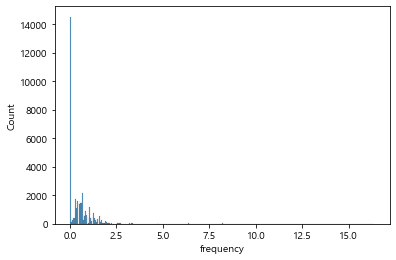

In [155]:
sns.histplot(x = 'frequency', data = X_train)

## 지역별 상위 1%에 해당하는 frequency는 outlier로 정의하고 제거

<AxesSubplot:xlabel='frequency', ylabel='Count'>

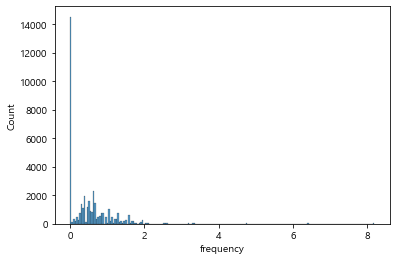

In [156]:
# 상위 1%에 해당하는 frequency 제거
outlier_dict = X_train.groupby('area')['frequency'].quantile(0.99).to_dict()
X_train['outlier'] = [outlier_dict[s] for s in X_train['area']]
X_train['outlier'] = (X_train['frequency'] <= X_train['outlier'])
X_train = X_train[X_train['outlier'] == True]

# area변수는 사용하지 않으므로 제거
X_train.drop(['outlier', 'area'], axis = 1, inplace = True)
X_valid.drop(['area'], axis = 1, inplace = True)
sns.histplot(x = 'frequency', data = X_train)

## 최종 학습 데이터에서 인구 100만명당 발병 비율이 상위 0.5%인 경우는 outlier로 정의하고 제거

<AxesSubplot:xlabel='frequency', ylabel='Count'>

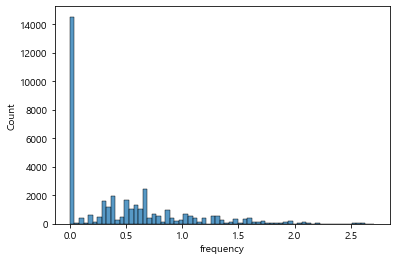

In [157]:
top_1percent =  X_train['frequency'].quantile(0.995)
X_train = X_train[X_train['frequency'] <= top_1percent]
sns.histplot(x = 'frequency', data = X_train)

In [158]:
X_train, y_train = X_train.drop('frequency', axis = 1), X_train['frequency']
X_valid, y_valid = X_valid.drop('frequency', axis = 1), X_valid['frequency']

In [159]:
X_train.columns

Index(['sex', 'ob_avg_tca', 'ob_ssrate', 'ob_sum_gsr', 'ob_avg_pa',
       'ob_max_pa', 'ob_avg_rhm', 'ob_min_rhm', 'ob_sum_rn', 'ob_avg_ta',
       'ob_max_ta', 'ob_min_ta', 'ob_min_vs', 'ob_avg_ws', 'ob_max_ws', '습도',
       '최고기온', '최저기온', 'ob_O3', 'ob_pm10', 'year', 'income', 'month',
       'weekend', '일교차_d', '일교차_d+1', 'last_day', 'holiday', 'area_group',
       '체감온도_d', '체감온도_d+1', 'ob_O3_d-1', 'ob_O3_d-2', 'ob_O3_d-3',
       'ob_pm10_d-1', 'ob_pm10_d-2', 'ob_pm10_d-3', 'area_rank'],
      dtype='object')

In [160]:
from ngboost import NGBRegressor

ngb_model = NGBRegressor(random_state = 220168)
ngb_model.fit(X_train, y_train)
y_valid_preds = ngb_model.predict(X_valid)

[iter 0] loss=0.7712 val_loss=0.0000 scale=2.0000 norm=1.3764
[iter 100] loss=0.6073 val_loss=0.0000 scale=2.0000 norm=1.2705
[iter 200] loss=0.5557 val_loss=0.0000 scale=2.0000 norm=1.2838
[iter 300] loss=0.5290 val_loss=0.0000 scale=2.0000 norm=1.2822
[iter 400] loss=0.5144 val_loss=0.0000 scale=2.0000 norm=1.2762


In [161]:
y_valid_ = y_valid.reset_index()['frequency']*X_valid_pop/1000000
preds_ = y_valid_preds*X_valid_pop/1000000
RMSE(y_valid_, preds_)

1.2085418675627504

1.2126421877635265

Text(0.5, 1.0, 'scale param')

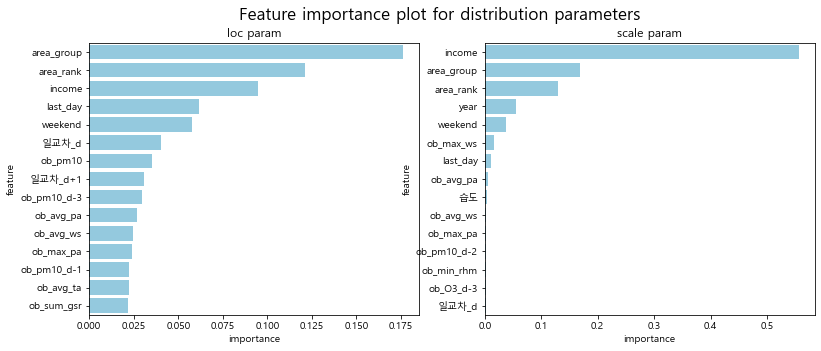

In [162]:
## Feature importance for loc trees
feature_importance_loc = ngb_model.feature_importances_[0]

## Feature importance for scale trees
feature_importance_scale = ngb_model.feature_importances_[1]

df_loc = pd.DataFrame({'feature':list(X_train),
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False).iloc[:15]
df_scale = pd.DataFrame({'feature':list(X_train),
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False).iloc[:15]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").\
set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").\
set_title('scale param')

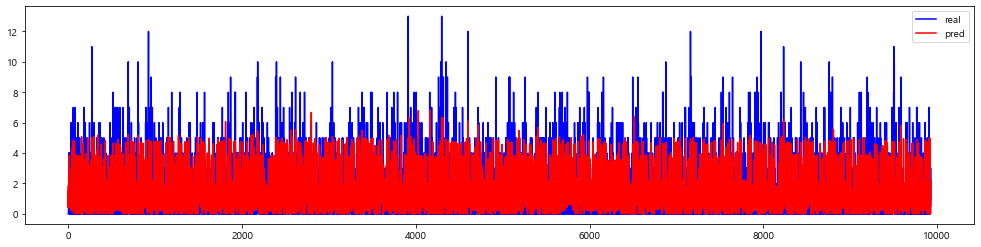

In [164]:
plt.figure(figsize = (17, 4))
plt.plot(np.arange(len(y_valid_)), y_valid_, color = 'blue', label = 'real')
plt.plot(np.arange(len(y_valid_)), preds_, color = 'red', label = 'pred')
plt.legend()
plt.show()

### valid set에 대해서 검증 결과 확인

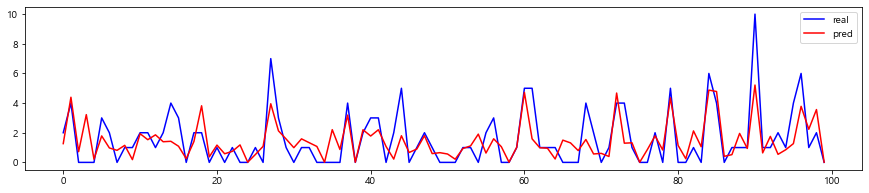

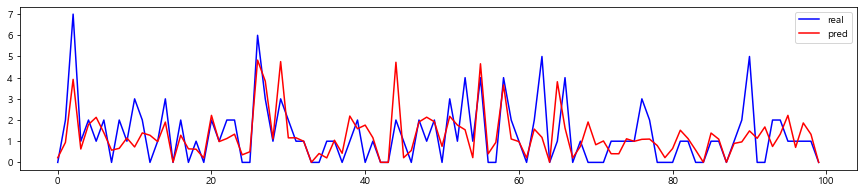

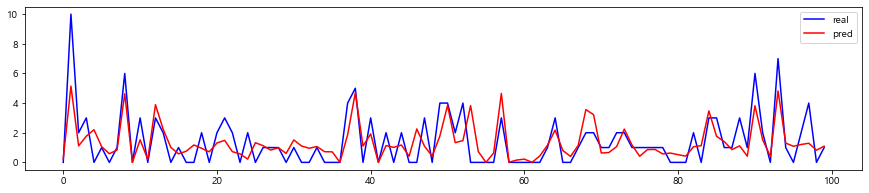

In [175]:
plt.figure(figsize = (15, 3))
loc = 600
plt.plot(np.arange(100), y_valid_[loc:loc+100], color = 'blue', label = 'real')
plt.plot(np.arange(100), preds_[loc:loc+100], color = 'red', label = 'pred')
plt.legend()
plt.show()

plt.figure(figsize = (15, 3))
plt.plot(np.arange(100), y_valid_[loc+100:loc+200], color = 'blue', label = 'real')
plt.plot(np.arange(100), preds_[loc+100:loc+200], color = 'red', label = 'pred')
plt.legend()
plt.show()


plt.figure(figsize = (15, 3))
plt.plot(np.arange(100), y_valid_[loc+200:loc+300], color = 'blue', label = 'real')
plt.plot(np.arange(100), preds_[loc+200:loc+300], color = 'red', label = 'pred')
plt.legend()
plt.show()

## Final model

In [166]:
final_preds = ngb_model.predict(test_imputed)
final_preds = np.maximum(0, final_preds)
submission['frequency'] = final_preds

### 인구수를 곱해서 frequency로 다시 변환

In [167]:
population = pd.read_csv('../dataset/used/2016_인구.csv', encoding = 'euc-kr')
population.drop('65세이상인구', axis = 1, inplace = True)
submission = pd.merge(submission, population, left_on = 'area', right_on = 'area', how = 'left')
submission['frequency'] = submission['frequency']* submission['전체인구']/1000000
submission.drop('전체인구', axis = 1, inplace = True)

In [168]:
print('예측값 max : ', submission['frequency'].max())
print('예측값 min : ', submission['frequency'].min())

예측값 max :  7.552151422957249
예측값 min :  0.01658350695592104


### 최종 예측 결과 csv로 저장

In [169]:
submission

,yyyymmdd,area,sex,frequency
0,2016-01-01,강원,1,1.803554
1,2016-01-01,경기,1,6.095859
2,2016-01-01,경남,1,3.397016
3,2016-01-01,경북,1,3.140078
4,2016-01-01,광주,1,1.511721
...,...,...,...,...
12439,2016-12-31,전남,2,1.167238
12440,2016-12-31,전북,2,1.034140
12441,2016-12-31,제주,2,0.260320
12442,2016-12-31,충남,2,0.947993


In [170]:
submission.to_csv('220168.csv', index = False, encoding = 'euc-kr')

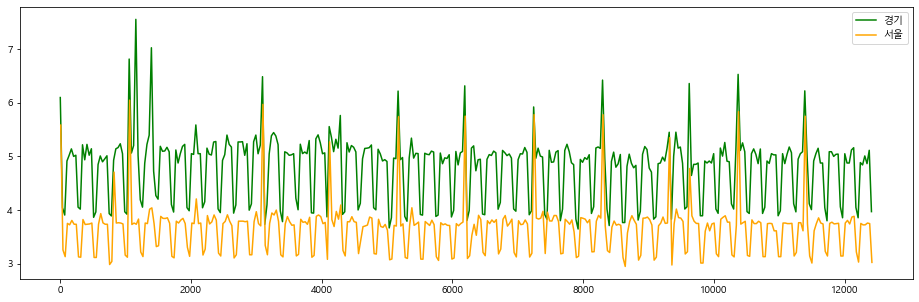

In [171]:
plt.figure(figsize = (16, 5))
plt.plot(submission[(submission['area'] == '경기') & (submission['sex'] == 1)]['frequency'],
         color = 'green', label = '경기')
plt.plot(submission[(submission['area'] == '서울') & (submission['sex'] == 1)]['frequency'],
         color = 'orange', label = '서울')
plt.legend()
plt.show()

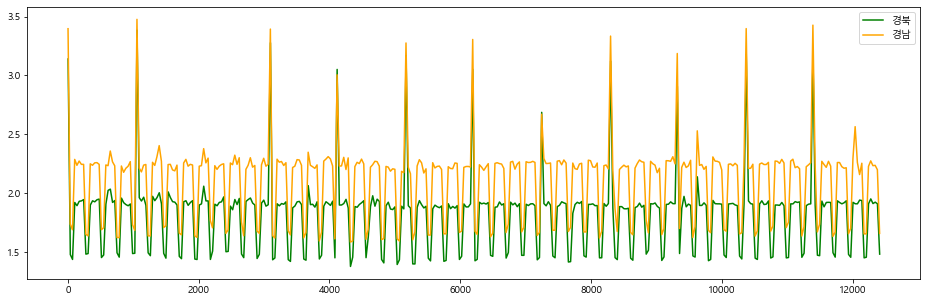

In [172]:
plt.figure(figsize = (16, 5))
plt.plot(submission[(submission['area'] == '경북') & (submission['sex'] == 1)]['frequency'],
         color = 'green', label = '경북')
plt.plot(submission[(submission['area'] == '경남') & (submission['sex'] == 1)]['frequency'],
         color = 'orange', label = '경남')
plt.legend()
plt.show()